In [1]:
import os
import sys
import numpy as np
import h5py as h5
import glob

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.colors import LogNorm
import ion_plot_definitions as ipd

import plotting_tools as pt 
#import spec_helper_functions as shf

sys.path.append('../analysis')
import spectrum_analysis_tools as spa
import imp


import seaborn as sns
sns.set_style("ticks",{'axes.grid': True, "ytick.major.size": 0.1,
                "ytick.minor.size": 0.05,
                'grid.linestyle': '--'
            })

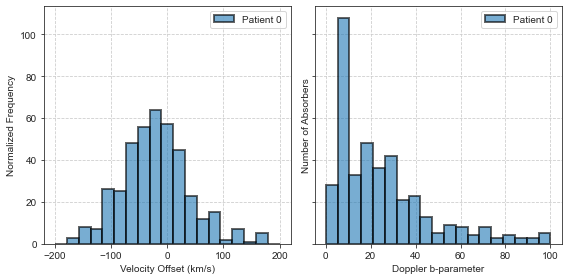

In [18]:
fn = '../../data/analyzed_spectra/combined_spectra.h5'

model = 'P0'
vel = pt.load_data(['vel'], fn = fn)
vel_p0 = pt.load_data(['vel'], model = model, fn = fn)

vel = vel[vel > -1000]
vel_p0 = vel_p0[vel_p0 > -1000]

bval = pt.load_data(['bval'], fn = fn)
bval_p0 = pt.load_data(['bval'], model = model, fn = fn)

bval = bval[bval > -1000]
bval_p0 = bval_p0[bval_p0 > -1000]


fig, ax = plt.subplots(nrows =1, ncols =2, figsize =(8, 4), sharey = True, sharex= False)
lw = 2
ht = 'stepfilled'
ht = 'bar'
dens = False
nbin = np.linspace(-200, 200, 20)
ec = 'black'
alpha = 0.6

ax[0].hist(vel_p0,  bins = nbin, linewidth = lw, histtype = ht, density = dens, label= 'Patient 0', edgecolor = ec, alpha = alpha)
#ax[0].hist(vel_stream, bins = nbin, linewidth = lw, histtype = ht, density = dens, label= 'Streaming', edgecolor = ec, alpha = alpha)
ax[0].legend()
ax[0].set_ylabel('Normalized Frequency')
ax[0].set_xlabel('Velocity Offset (km/s)')

nbin = np.linspace(0, 100, 20)
ax[1].hist(bval_p0,  bins = nbin, linewidth = lw, histtype = ht, density = dens, label= 'Patient 0', edgecolor = ec, alpha = alpha)
#ax[1].hist(bval_stream, bins = nbin, linewidth = lw, histtype = ht, density = dens, label= 'Streaming', edgecolor = ec, alpha = alpha)
ax[1].legend()
ax[1].set_ylabel('Number of Absorbers')
ax[1].set_xlabel('Doppler b-parameter')

fig.tight_layout()
plt.savefig('../../plots/vel_bval_histogram_%s.png'%model, dpi = 300)

/Users/irynabutsky/Dropbox/SyntheticSpecCGM/ENZO/scripts/plotting/plotting_tools.py:100: RuntimeWarning: overflow encountered in power
  yerr = 10**yerr


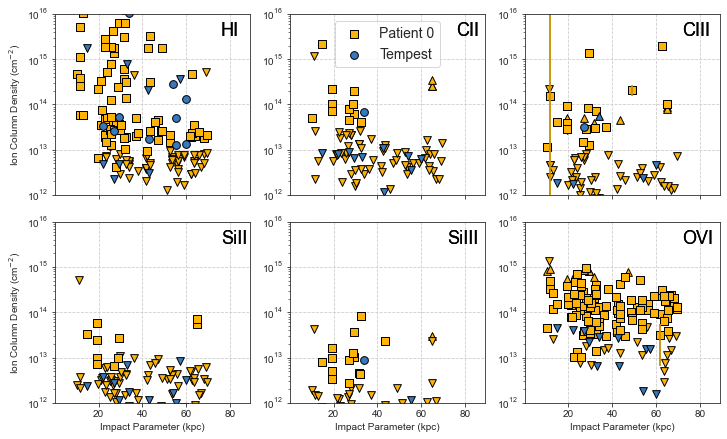

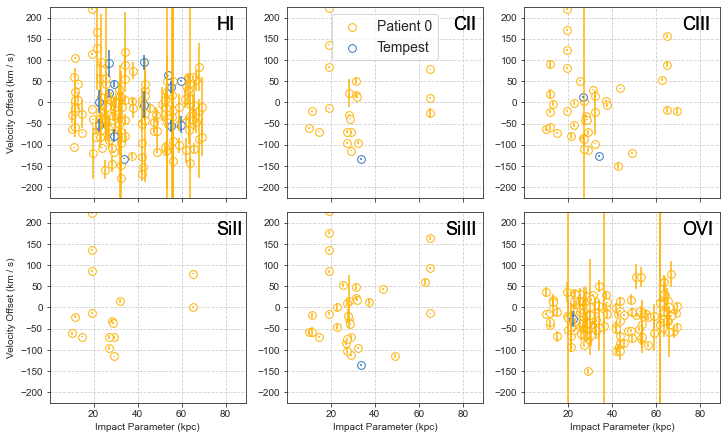

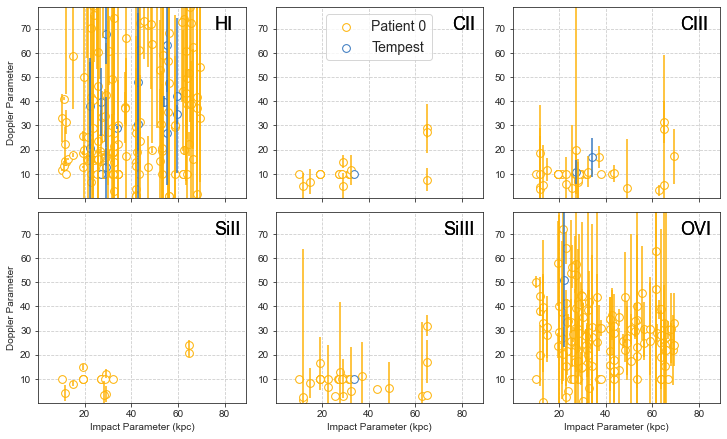

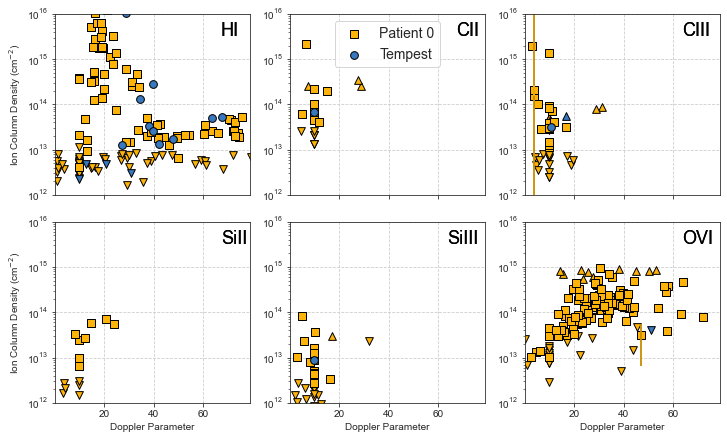

In [9]:
ion_list = ['H I', 'C II', 'C III', 'Si II', 'Si III', 'O VI']
#ion_list = ['H I', 'O VI', 'N V']

xfields = ['impact', 'impact', 'impact', 'bval']
yfields = ['col', 'vel', 'bval', 'col']


for compare in ['model']:
    for xfield, yfield in zip(xfields, yfields):
        nrows = 2; ncols =3;
        fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize=(3.4*ncols, 3.1*nrows), sharex = True, sharey = False)
        figg, aax = pt.plot_multipanel_scatter(ion_list, xfield = xfield, yfield = yfield, nrows = nrows, compare = compare, \
                                           fig = fig, ax = ax, marker_size = 60, set_ylim = True, fn = fn)

        ax[0][1].legend(loc = 'upper center', fontsize = 14, frameon = True)
        plt.savefig('../../plots/%s_%s_%s.png'%(xfield, yfield, compare), dpi = 300)




../../plots/bval_col_ovi_P0.png


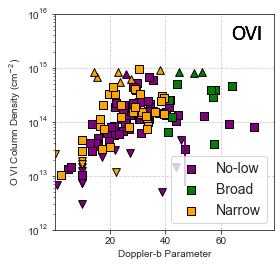

In [24]:
imp.reload(ipd)
imp.reload(pt)
ion_list = ['O VI']

xfield = 'bval'
yfield = 'col'

fn = '../../data/analyzed_spectra/combined_spectra.h5'
model = 'P0'

nrows = 1; ncols =1;
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize=(4*ncols, 3.8*nrows), sharex = True, sharey = False)
figg, aax = pt.plot_multipanel_scatter(ion_list, xfield = 'bval', yfield = 'col', nrows = nrows, fn = fn, \
                                        model = model, compare = 'ovi', fig = fig, ax = ax, marker_size = 60, set_ylim = True)

ax.legend(loc = 4,  fontsize = 14, frameon = True)

ax.set_ylabel('O VI Column Density (cm$^{-2}$)')
ax.set_xlabel('Doppler-b Parameter')

fig.tight_layout()
figname = '../../plots/%s_%s_%s_%s.png'%(xfield, yfield, 'ovi', model)
print(figname)
plt.savefig(figname, dpi = 300)


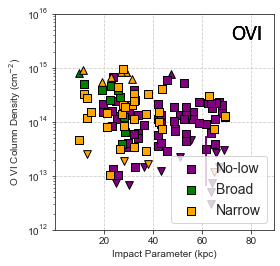

In [63]:
imp.reload(ipd)
imp.reload(pt)
ion_list = ['O VI']

xfield = 'impact'
yfield = 'col'
rmax = 90
ylims = (1e12, 1e16)

nrows = 1; ncols =1;
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize=(4*ncols, 3.8*nrows), sharex = True, sharey = False)
figg, aax = pt.plot_multipanel_scatter(ion_list, xfield = xfield, yfield = yfield, nrows = nrows, \
                                        compare = 'ovi', fig = fig, ax = ax, marker_size = 60, set_ylim = True)


ax.legend(loc = 4, fontsize = 14, frameon = True)
ax.set_ylabel('O VI Column Density (cm$^{-2}$)')
ax.set_xlabel('Impact Parameter (kpc)')
 
fig.tight_layout()
plt.savefig('../../plots/%s_%s_%s.png'%(xfield, yfield, 'ovi'), dpi = 300)

In [70]:
def plot_hist2d(ax, r_arr, cdens_arr, rmax,  ylims, cmap='GnBu', vmin=1, vmax=None):
    nbins = 400
    xbins = np.linspace(0, rmax, nbins)
    ybins = 10**np.linspace(np.log10(ylims[0]), np.log10(ylims[1]), nbins)
    counts, x_edge, y_edge = np.histogram2d(r_arr, cdens_arr, bins=(xbins, ybins))
    x_bin_center = ((x_edge[1:] + x_edge[:-1]) / 2).reshape(nbins-1,1)
    # normalize counts in x-space to remove out linear increase in counts with                            
    # radius due to circles of constant impact parameter                                                  
    counts /= x_bin_center                                                                                               
    print(counts.max())
    if vmax == None:
        vmax = counts.max()
    im = ax.pcolormesh(xbins, ybins, counts.T, vmin=vmin, vmax=vmax, cmap=cmap, norm=LogNorm())
    return im

1.596


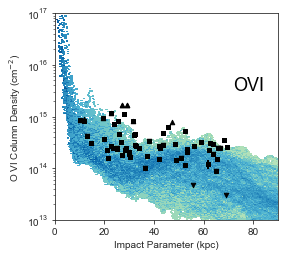

In [74]:
ylims = (1e13, 1e17)
rmax = 200
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(4, 3.8))
r_arr, cdens_arr = ipd.load_r_cdens('../../data/simulated_ion_column_densities_P0.h5', 'OVI')
im = plot_hist2d(ax, r_arr, cdens_arr, rmax,  ylims, vmin = 1e-3)

pt.plot_data_scatter('OVI', xfield = 'impact', yfield = 'total_col', ax = ax, \
                             model = 'P0', redshift = 0.25,\
                              axis_labels = False)

ax.set_ylabel('O VI Column Density (cm$^{-2}$)')
ax.set_xlabel('Impact Parameter (kpc)')
ax.set_xlim(0, 90)
ax.set_ylim(1e13, 1e17)

plt.savefig('../../plots/P0_sim_ovi_column_impact.png', dpi = 300)

1.0384931506849315


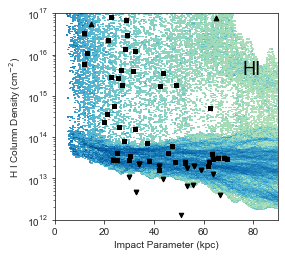

In [76]:
ylims = (1e12, 1e17)
rmax = 200
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(4, 3.8))
r_arr, cdens_arr = ipd.load_r_cdens('../../data/simulated_ion_column_densities_P0.h5', 'HI')
im = plot_hist2d(ax, r_arr, cdens_arr, rmax,  ylims, vmin = 1e-3)

pt.plot_data_scatter('HI', xfield = 'impact', yfield = 'total_col', ax = ax, \
                             model = 'P0', redshift = 0.25,\
                              axis_labels = False)

ax.set_ylabel('H I Column Density (cm$^{-2}$)')
ax.set_xlabel('Impact Parameter (kpc)')
ax.set_xlim(0, 90)
ax.set_ylim(1e12, 1e17)

plt.savefig('../../plots/P0_sim_hi_column_impact.png', dpi = 300)

In [5]:
import yt
from yt import YTArray 



In [6]:
ds = yt.load('/Users/irynabutsky/Work/galaxy/P0/P0.003195')


yt : [INFO     ] 2020-04-14 20:50:07,193 Parameters: current_time              = 3.3988696927205075e+17 s
yt : [INFO     ] 2020-04-14 20:50:07,194 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2020-04-14 20:50:07,195 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2020-04-14 20:50:07,197 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2020-04-14 20:50:07,199 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2020-04-14 20:50:07,201 Parameters: current_redshift          = 0.2497948824964893
yt : [INFO     ] 2020-04-14 20:50:07,202 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2020-04-14 20:50:07,203 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2020-04-14 20:50:07,205 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-04-14 20:50:07,206 Parameters: hubble_constant           = 0.677583430663222


In [7]:
center = YTArray([-1.693207e4, -1.201068e4, 5.303337e3], 'kpc')


In [8]:
center

unyt_array([-16932.07 , -12010.68 ,   5303.337], 'kpc')

In [9]:
ds.domain_right_edge


unyt_array([0.5, 0.5, 0.5], 'code_length')

In [10]:
ds.domain_right_edge.in_units('kpc')

unyt_array([20003.28241868, 20003.28241868, 20003.28241868], 'kpc')

In [11]:
center *= 0.5 / 20003.28241868

In [12]:
v, gcenter = ds.h.find_maximum_density('')


unyt_array([-0.42323229, -0.30021773,  0.13256167], 'kpc')

yt : [INFO     ] 2020-04-14 20:56:03,931 xlim = -0.425732 -0.420733
yt : [INFO     ] 2020-04-14 20:56:03,932 ylim = -0.302717 -0.297718
yt : [INFO     ] 2020-04-14 20:56:03,933 xlim = -0.425732 -0.420733
yt : [INFO     ] 2020-04-14 20:56:03,943 ylim = -0.302717 -0.297718
yt : [INFO     ] 2020-04-14 20:56:03,947 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



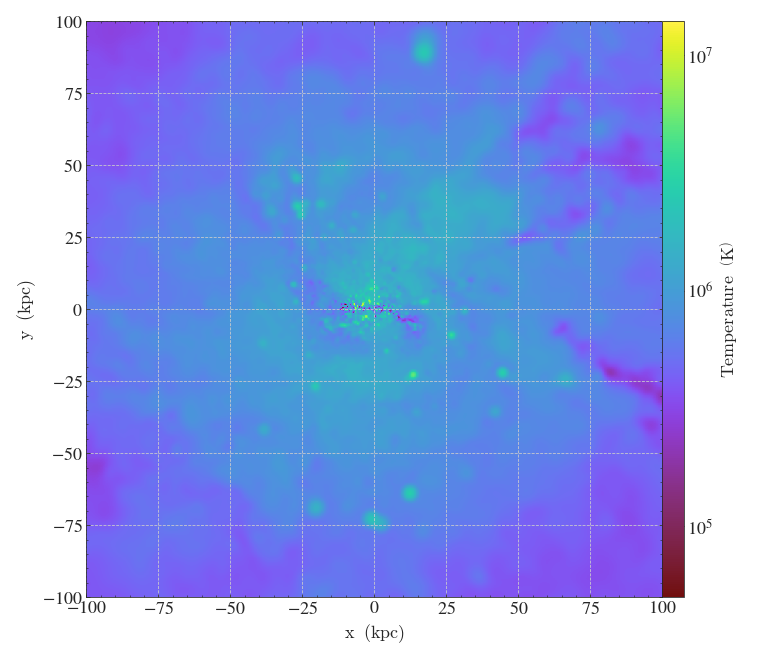

In [25]:
s = yt.SlicePlot(ds, 'z', ('gas', 'temperature'), width = (200, 'kpc'), center = center)
s.show()

In [17]:
center

unyt_array([-0.42323229, -0.30021773,  0.13256167], 'kpc')

In [18]:
center = center.d

In [19]:
center

array([-0.42323229, -0.30021773,  0.13256167])